# Introducción a Gráficos y Ecuaciones diferenciales ordinarias
#### https://meet.noysi.com/metodosnumericos2

## Funciones de dos variables

Vamos a comenzar con algunos ejemplos de gráficas que iremos usando en la asignatura.

Empezamos considerando la función de dos variables
$$F(x,y)=x^2+y^2$$

In [ ]:
F(x,y) = x^2+y^2

Para representar la gráfica de la función podemos usar `plot3d`, que dibuja la superficie $$(x,y)\to(x,y,F(x,y)).
$$

In [ ]:
plot3d(F,(x,-1,1),(y,-1,1))

La representación en tres dimensiones a veces es complicada de visualizar. Por eso, para representar la gráfica de una función podemos optar por representar sus curvas de nivel usando `contour_plot`, es decir, las curvas definidas implícitamente por $F(x,y)=h$, donde $h$ toma valores en un cierto conjunto (que se puede modificar con la opción `contours`).

In [ ]:
contour_plot(F(x,y),(x,-2,2),(y,-2,2),labels=true)

In [ ]:
contour_plot(F(x,y),(x,-2,2),(y,-2,2),labels=true,fill=false,contours=[0.1, 0.2 .. 1]+[1.5]+[2 .. 7])

Con la función `implicit_plot` podemos dibujar una curva de nivel concreta.

In [ ]:
implicit_plot(F(x,y)==1,(x,-2,2),(y,-2,2))

## Curvas

Un tipo de representación muy importante para las ecuaciones diferenciales son las curvas paramétricas. Si tenemos la circunferencia parametrizada, por ejemplo, por
$$t\in(0,2\pi)\to (\cos t,\sin t),$$
podemos representarla con la función `parametric_plot`.

In [ ]:
var('t')
parametric_plot([cos(t),sin(t)],(t,0,2*pi))

También hay una versión tridimensional si nuestra curva tiene imagen en $\mathbb{R}^3$. Hemos usado la opción `plot_points` para hacer la curva más "suave".

In [ ]:
var('t')
parametric_plot([exp(-t/10)*cos(2*t),exp(-t/10)*sin(2*t),t],(t,0,8*pi),plot_points=200)

Recordemos que siempre podemos usar la función `line` para dibujar curvas. Basta crear una lista con los puntos por los que queremos que pase la curva y aplicarles la función. Por ejemplo, consideremos la función anterior y generemos puntos equiespaciados 0.1 unidades. Mostramos los 10 primeros para ver cómo son.

In [ ]:
puntos = [(exp(-t/10)*cos(2*t),exp(-t/10)*sin(2*t),t) for t in [0,0.1 .. 8*pi]]
puntos[:10]

Ahora aplicamos la función `line`. 

In [ ]:
line(puntos)

## Animaciones

Para crear una animación, primero tenemos que hacer una de gráficos. Cada uno será un fotograma de la animación. ¡Ojo¡ Esto ocupa bastante memoria, así que las animaciones deberán ser de pocos fotogramas. 

In [ ]:
fotogramas = [parametric_plot([cos(t),sin(t)],(t,0,k)) 
     + point(([-2,2],[2,-2]),size=0)
     for k in [pi/20,2*pi/20 .. 2*pi]]
fotogramas[10]

A continuación usamos la orden `animate` sobre la lista para transformarla en una animación. Para visualizarla tenemos que usar la función `show`.

In [ ]:
animacion = animate(fotogramas)
show(animacion)

Vamos a crear una animación más compleja. Primero creamos una función que nos devuelve la trayectoria de una pelota que rebota en una caja.

In [ ]:
def pelota(p,v,n):
    # p,v son los vectores posición y velocidad (p ha de estar en [0,1]x[0,1])
    # n es el número de pasos
    pv = vector(p)
    vv = vector(v)
    posiciones = [pv]
    for _ in range(n):
        # Comprobamos si se sale del cuadrado unidad. En dicho caso "rebota"
        if ( pv + vv )[0]<0:
            vv = vector([ -vv[0] , vv[1] ])
        if ( pv + vv )[0]>1:
            vv = vector([ -vv[0] , vv[1] ])
        if ( pv + vv )[1]<0:
            vv = vector([ vv[0] , -vv[1] ])
        if ( pv + vv )[1]>1:
            vv = vector([ vv[0] , -vv[1] ])
        pv = pv + vv
        posiciones += [pv]
    return posiciones

Podemos representar la solución obtenida tras mil pasos, comenzando en cierta posición y velocidad mediante `line`.

In [ ]:
line(pelota([0.2,0.3],[0.011,-0.013],1000))

Si hacemos una lista de fotogramas, podemos crear una animación. Veremos que tarda bastante en generarla, porque la función `animate` es muy básica. Para animaciones más complicadas se puede usar la librería matplotlib (ver  https://matplotlib.org/stable/users/explain/animations/animations.html). Para animaciones más artísticas, se puede utilizar manim https://www.manim.community/ (no instalada en sage.unex.es). 

In [ ]:
fotogramas = [point(pk,axes=false,size=50) 
     + point(([0,1],[1,0]),size=0) 
     + line([ (0,0), (0,1) , (1,1) , (1,0), (0,0) ], color='black')
     for pk in pelota([0.2,0.3],[0.011,-0.013],300)]
animacion = animate(fotogramas)
show(animacion)

In [ ]:
trayectoria = pelota([0.2,0.3],[0.011,-0.013],300)
lt = line(trayectoria,color='gray',linestyle='--')

In [ ]:
fotogramas = [lt + point(pk,axes=false,size=50) 
     + line([ (0,0), (0,1) , (1,1) , (1,0), (0,0) ], color='black')
     for pk in trayectoria]
animacion = animate(fotogramas)
show(animacion)

### Ejercicios
1. Consideremos una función de tres variables
$$F(x,y,z) = y^2 - x^2(x+1) + x y z.$$
a) Un modo de visualizar la función es dibujar las curvas de nivel fijando una de las tres variables. Por ejemplo, toma los valores de $z$ correspondientes a $-1$, $-0.5$, $0$, $0.5$, $1$ y representa las curvas de nivel. 

b) También podemos representarlas en 3D. Muchos de los comandos de Sage para dibujar en 2D tienen la versión correspondiente en 3D que suele coincidir (salvo que hay que poner 3d al final). Dibuja alguna superficie de nivel. 

c) Calcula los puntos donde se anula la derivada de la función y represéntalos. Representa también las superficies de nivel correspondientes a los valores de la función en dichos puntos.


In [ ]:
F(x,y,z) = y^2 -  x^2*(x+1) + x*y*z

In [ ]:
G = [ contour_plot(F(x,y,zk),(x,-1,1),(y,-1,1),fill=false)
    for zk in [-1, -0.5 .. 1]]
graphics_array([[G[0],G[1],G[2]],[G[3],G[4],G[4]]])

In [ ]:
implicit_plot3d(F(x,y,z)==1,(x,-2,2),(y,-2,2),(z,-1,1))\
+ implicit_plot3d(F(x,y,z)==0,(x,-2,2),(y,-2,2),(z,-1,1),opacity=0.5,color='red')\
+ implicit_plot3d(F(x,y,z)==-0.2,(x,-2,2),(y,-2,2),(z,-1,1),color='green')

In [ ]:
F.diff()

In [ ]:
solve([-2*(x + 1)*x - x^2 + y*z==0,x*z + 2*y==0,x*y==0],x,y,z)

In [ ]:
F(-2/3,0,0)

In [ ]:
implicit_plot3d(F(x,y,z)==-4/27,(x,-1,1),(y,-1,1),(z,-1,1),color='green',plot_points=200)

2. Calcula valores de $p,v$ de modo que la órbita que sigue la "pelota" sea cerrada. 

a)Dibuja alguna de dichas órbitas. 

b)Haz una animación donde se vea la pelota recorriendo dicha órbita (en la animación, se debe ver tanto la órbita que describe la pelota como la pelota moviéndose). 

c) Modifica la función pelota para que funcione en $\mathbb{R}^3$, en el cubo unidad.

# Ecuaciones diferenciales
Consideremos la ecuación diferencial definida por 
$$x'=2y,\quad y'=3x^2 + 2x.$$
Vamos a mostrar algunas herramientas para visualizar la ecuación. Comenzaremos definiendo el campo asociado y dibujando el campo de pendientes.

In [ ]:
X(x,y) = [2*y, 3*x^2 + 2*x]

In [ ]:
cv = plot_vector_field(X(x,y),(x,-1.2,0.5),(y,-1,1))
cv

## Puntos de equilibrio
El primer paso a la hora de estudiar una ecuación diferencial es obtener los puntos de equilibrio, que se corresponden con las soluciones constantes. Nótese que en algunas ocasiones puede ser muy complicado resolverlo, ya que consiste en resolver un sistema de ecuaciones no lineales. 

In [ ]:
solve([X(x,y)[0]==0,X(x,y)[1]==0],x,y)

Vamos a representar los puntos de equilibrio sobre el campo de pendientes.

In [ ]:
cv + point([(0,0),(-2/3,0)],color='red',size=40)

## Linealizado
Vamos a calcular el linealizado en cada punto de equilibrio, es decir, desarrollamos el campo en serie de Taylor en el punto y nos quedamos con la parte lineal. El Teorema de Hartman-Grobman dice que si la parte lineal del campo tiene todos sus autovalores con parte real no nula, entonces el campo linealizado "controla" la dinámica local en el punto de equilibrio.

In [ ]:
# Punto (0,0)
X

In [ ]:
# La parte lineal será (2y,2x)
X0(x,y)=[2*y,2*x]
cv0=plot_vector_field(X0(x,y),(x,-0.5,0.5),(y,-0.5,0.5),color='red')
cv0

In [ ]:
# Comparamos con el campo original
plot_vector_field(X(x,y),(x,-0.5,0.5),(y,-0.5,0.5)) + cv0

In [ ]:
# Otra manera de obtener la parte lineal
# a partir de la matriz jacobiana
X.diff()(0,0)*vector([x,y])

## El oscilador armónico
Consideremos el oscilador armónico, es decir, $\ddot x = - k x$. Mediante un cambio de variables en el tiempo podemos suponer que $k=1$. Las soluciones de este sistema son de la forma $x(t) = a \cos(t) + b \sin (t)$ o, equivalentemente, $x(t) = A \cos(t-\phi)$.

Podemos escribir la ecuación como un sistema plano introduciendo una variable $y=\dot x$. Entonces
$$x' = y,\quad y' = - x.$$

In [ ]:
X(x,y) = [y,-x]
cv = plot_vector_field(X(x,y),(x,-1.5,1.5),(y,-1.5,1.5))
cv

Este es un sistema Hamiltoniano, cuyo Hamiltoniano es $H(x,y) = x^2+y^2$. Así que las órbitas de las soluciones son las curvas de nivel del Hamiltoniano, que hemos representado en la primera parte de la práctica. 

Por último, vamos a hacer una pequeña animación relacionando la solución del sistema determinada por la condición inicial $(1,0)$, es decir, $(\cos(-t),\sin(-t))$ con una simulación del oscilador.

In [ ]:
def muelle(t):
    xt = cos(t)
    dibujo = point((xt,-2),axes=false,size=50,color='red') + point(([2,2],[-2,-3]),size=0)
    dibujo += line([(-2,-2)] + [(-2+k*(xt+2)/10,-2+(-1)^k/10) for k in [1 .. 9]] + [(xt,-2)])
    dibujo += cv
    dibujo += implicit_plot(x^2+y^2==1,(x,-2,2),(y,-2,2),color=[0.8,0.8,0.8])
    dibujo += point((cos(-t),sin(-t)),axes=false,size=50,color='green')
    dibujo += line([ (cos(-t),sin(-t)) , (xt,-2) ],color='gray',linestyle='--')
    return dibujo

In [ ]:
animacion = animate([muelle(t) for t in [0, 0.1 .. 2*pi]])

In [ ]:
show(animacion)

### Ejercicios
1. Consideremos la ecuación diferencial
$$x'=e^{-t}(x^2-x)$$

    a) Busca ayuda sobre la función plot_slope_field. Dibuja el campo de pendientes de la ecuación anterior. 

    b) Calcula las soluciones constantes y represéntalas. 

    c) Calcula una solución no constante que esté acotada y represéntala. 

In [16]:
f(t,x) = exp(-t)*(x^2-x)

In [17]:
cv=plot_slope_field(f(t,x),(t,-2,2),(x,-0.5,1.5))

In [18]:
solve(f(t,x)==0,x)

[x == 0, x == 1]

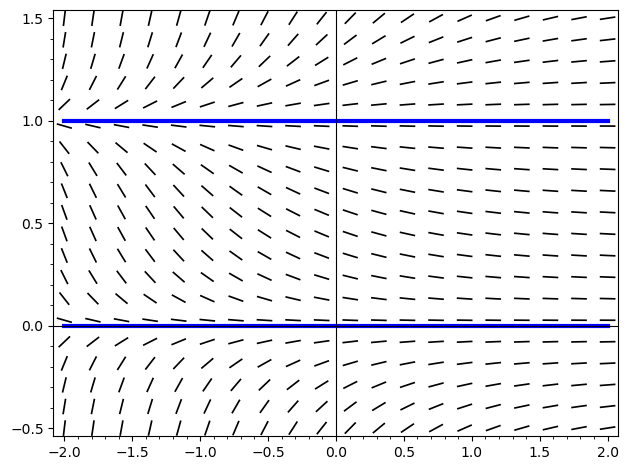

In [19]:
cv + plot(0,-2,2,thickness=3)+plot(1,-2,2,thickness=3)

In [20]:
t = var('t')
u = function('u')(t)
s = desolve(diff(u,t) == exp(-t)*(u^2-u), u, ics=[0,1/2])
s

log(u(t) - 1) - log(u(t)) == ((I*pi + log(2) + log(1/2) + 1)*e^t - 1)*e^(-t)

In [21]:
s.log_simplify()

log((u(t) - 1)/u(t)) == ((I*pi + 1)*e^t - 1)*e^(-t)

In [22]:
solve(s.log_simplify(),u)

[u(t) == (1/(e^(-e^(-t) + 1) + 1))]

In [23]:
u(t) = 1 / (e^(-e^(-t) + 1) + 1)
show(u)

t |--> 1/(e^(-e^(-t) + 1) + 1)

In [26]:
(u.diff()(t) - f(t,u(t))).simplify_full()

0

In [28]:
e.n()

2.71828182845905

In [30]:
u(t) = e^(e^(-t))/(e + e^(e^(-t)))

In [31]:
(u.diff()(t) - f(t,u(t))).simplify_full()

0

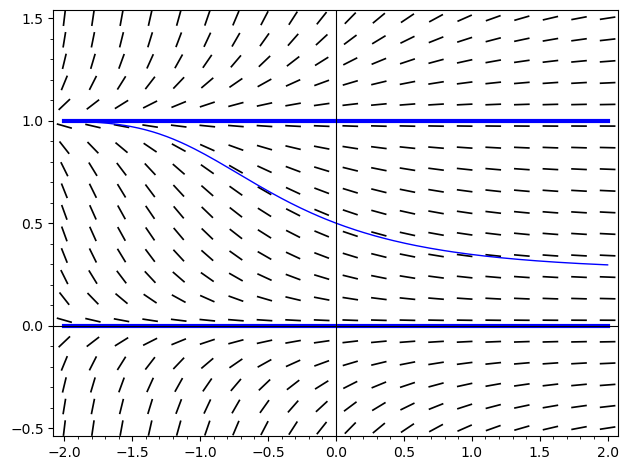

In [32]:
cv + plot(0,-2,2,thickness=3)+plot(1,-2,2,thickness=3)\
+ plot(u(t),-2,2)

2. Consideremos de nuevo el sistema diferencial definido por
$$x'=2y,\quad y'=3x^2 + 2x$$
    a) Calcula el campo lineal en el punto de equilibrio $(-2/3,0)$.
    
    b) Calcula los autovalores y autovectores de la matriz jacobiana en los dos puntos de equilibrio. En el caso en el que sean reales, represénta los autovectores sobre el campo de vectores. 
    
    c) El sistema es hamiltoniano, con función hamiltoniana $$F(x,y) = y^2-x^2(x+1).$$
    Representa alguna de las curvas de nivel de esta función sobre el campo. 

In [33]:
X(x,y) = [2*y, 3*x^2+2*x]

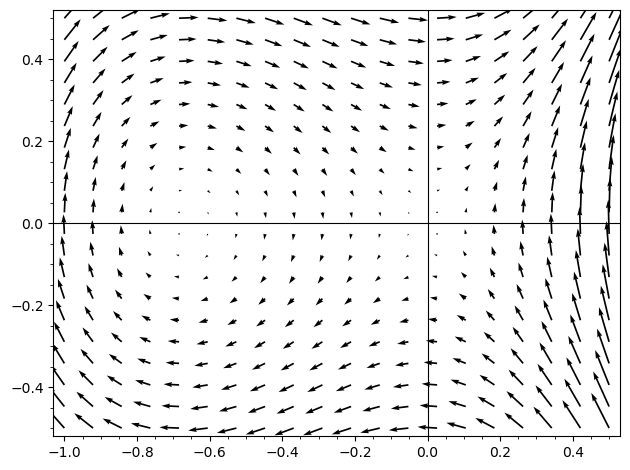

In [41]:
vf = plot_vector_field(X(x,y),(x,-1,0.5),(y,-0.5,0.5))
vf

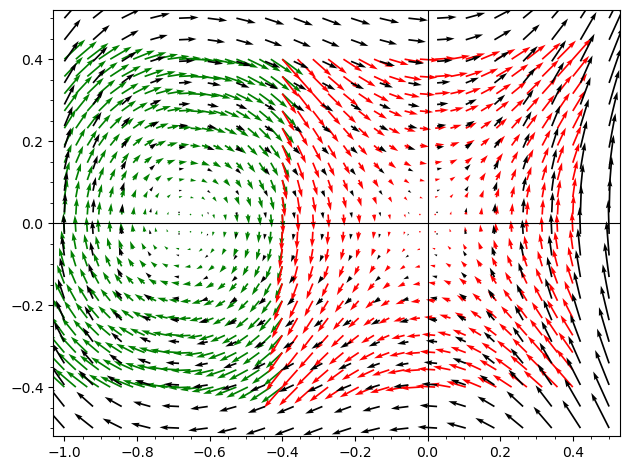

In [47]:
plot_vector_field([2*y,-2*(x+2/3)],(x,-1,-0.4),(y,-0.4,0.4),color='green') +\
plot_vector_field([2*y,2*x],(x,-0.4,0.4),(y,-0.4,0.4),color='red') +\
vf

In [49]:
2*y,-2*(x+2/3)

(2*y, -2*x - 4/3)

In [51]:
X.diff()(-2/3,0)*vector([x-(-2/3),y-0])

(2*y, -2*x - 4/3)

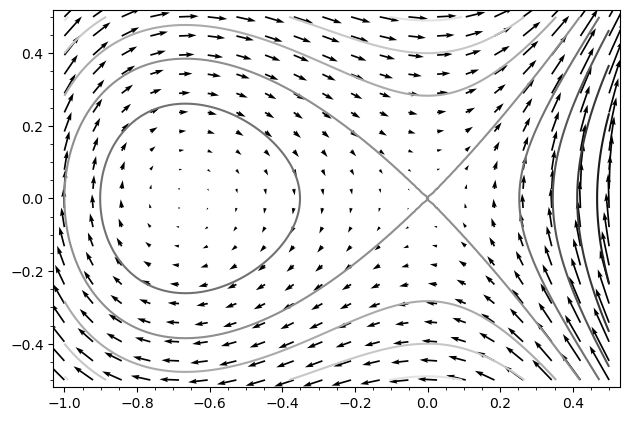

In [53]:
F(x,y) = y^2-x^2*(x+1)
contour_plot(F(x,y),(x,-1,0.5),(y,-0.5,0.5),fill=false) + vf

3. Consideremos el sistema Hamiltoniano definido por 
$$
x'=\frac{\partial F}{\partial y}(x,y),\quad 
y'=-\frac{\partial F}{\partial x}(x,y),\quad 
$$
donde $$F(x,y) = y^2-x^2(x+1)+\frac{y^6}{6}-\frac{x^4}{4}+\frac{x^6}{6}.$$
Calcular sus puntos de equilibrio, representar el campo y dibujar las curvas de nivel de $F(x,y)$ correspondientes a los 
valores de los puntos de equilibrio (es decir, las curvas implícitas definidas por $F(x,y)=F(x_0,y_0)$ donde 
$(x_0,y_0)$ es un punto de equilibrio del sistema.